In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib import colors
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

In [2]:
#Defining a class for the FN Neuron

class FNNeuron():
    
    def __init__(self,a = 0.5, b = 0.1, r = 0.1, dt = 0.01, iter = 20000):
        self.a = a            # Initalizing parameters
        self.b = b            # Initalizing parameters
        self.r = r            # Initalizing parameters
        
        self.v_monitor = []      # For monitioring the values of v
        self.w_monitor = []      # For monitioring the values of w
        self.t_monitor = []
        self.dt = dt
        
        self.I_app = 0         # Initializing the current, updated when <class_object>.model is run
        self.iter = iter
    #========================================================================================================
    def model(self, v: float, w: float, I_app: float):
        
        self.I_app = I_app
        self.v_monitor = []
        self.w_monitor = []
        self.t_monitor = []
        '''
        -------------------------------------------------
        Args:
            I_app: applied current
            v:     initial v
            w:     initial w
            
        Returns:
            v_monitor: v changes over iterations
            w_monitor: w changes over iterations
            t_monitor: t changes over iterations 
        --------------------------------------------------
        '''
        self.v_monitor.append(v)              # Appending inital value of v
        self.w_monitor.append(w)              # Appending inital value of w
        self.t_monitor.append(0)              # Appending inital value of t
        dt = self.dt
        iter = self.iter

        for i in range(iter):

            dv = (v*(self.a-v)*(v-1))- w + self.I_app
            v_next = v + (dt* dv)
            
            dw = (self.b*v)-(self.r*w)
            w_next = w + (dt* dw)
            
            v, w = v_next, w_next

            self.v_monitor.append(v)
            self.w_monitor.append(w)
            self.t_monitor.append((self.t_monitor[-1] + dt))


        return (self.v_monitor, self.w_monitor,self.t_monitor)  
    #========================================================================================================
    def PhasePlots(self, I_applied: float,xlim1: float, xlim2: float , ylim1: float, ylim2: float):
        
        '''
        -------------------------------------------------
        Args:
            I_app:     applied current
            xlim1:     lower x limit of the plot
            xlim2:     upper x limit of the plot (keep xlim2-xlim1 between 1.5 to 2.0 for clean plots)
            ylim1:     lower y limit of the plot
            ylim2:     upper y limit of the plot (keep ylim2-ylim1 between 0.6 to 0.9 for clean plots)
        --------------------------------------------------
        '''
          
        # ---------- Vector field plot (phase plane) ----------
        v = np.linspace(-0.1+xlim1, 0.1+xlim2, 22)           # Setting up the phase space
        w = np.linspace(-0.1+ylim1, 0.1+ylim2, 22)           # Setting up the phase space
        V, W = np.meshgrid(v, w, indexing='xy')
        
        # Computing dW/dV for the phase plot
        dV = V * (self.a - V) * (V - 1) - W + I_applied
        dW = self.b * V - self.r * W 

        # Color the vectors by magnitude of derivative
        speed = np.hypot(dV, dW)
        vmin, vmax = np.percentile(speed,45), np.percentile(speed, 90)
        norm = colors.Normalize(vmin=vmin, vmax=vmax, clip=True)

        plt.figure(figsize=(11, 5))
        q = plt.quiver(
            V, W, dV, dW, speed,
            angles='xy', scale_units='xy', scale= 10, pivot='mid',
            headwidth=2.0, headlength=2.25, headaxislength=3,
            cmap='turbo',         
            norm=norm
        )

        # ---------- Nullclines ----------
        v1 = np.linspace(-2, 2, 2000)                    # The data points for computing the v-nullcline 
        w1 = v1 * (self.a - v1) * (v1 - 1) + I_applied   # The data points for computing the v-nullcline 
        plt.plot(v1, w1, color='blue', linewidth=2, label='v-nullcline')

        w2 = np.linspace(-2, 2, 1000)                    # The data points for computing the w-nullcline 
        v2 = (self.r * w2) / self.b                      # The data points for computing the w-nullcline 
        plt.plot(v2, w2, color='red', linewidth=2, label='w-nullcline')

        # ---------- Plotting ----------
        plt.xlim(xlim1, xlim2)
        plt.ylim(ylim1, ylim2)
        plt.xlabel('v'); plt.ylabel('w')
        plt.title(f'Phase plane analysis, I_app={I_applied}, a = {self.a},b = {self.b}, r= {self.r}')
        plt.grid(True, linestyle='--', alpha=0.4)
        plt.legend(
            loc='upper left',            # legend position reference
            bbox_to_anchor=(1.02, 1),    # (x, y) position just outside the axes
            borderaxespad=0,             # padding between axes and legend
            fontsize=12
        )
        plt.tight_layout()

        plt.show()
    #========================================================================================================

In [3]:
def Trajectories(v1, v2, v3, w1, w2, w3,xlim1, xlim2, ylim1, ylim2, I_applied, a = 0.5, b = 0.1, r = 0.1):
    
    '''
    -------------------------------------------------
    Args:
        v_n:       v data, in a list form
        w_n:       w data, in a list form
        xlim1:     lower x limit of the plot 
        xlim2:     upper x limit of the plot (keep xlim2-xlim1 between 1.5 to 2.0 for clean plots)
        ylim1:     lower y limit of the plot
        ylim2:     upper y limit of the plot (keep ylim2-ylim1 between 0.6 to 0.9 for clean plots)
        I_app:     applied current
        a:         parameter of the FN neuron (required to plot the nullcline)
        b:         parameter of the FN neuron (required to plot the nullcline) 
        r:         parameter of the FN neuron (required to plot the nullcline) 
    --------------------------------------------------
    '''
    
    # ---------- Setup ----------
    plt.figure(figsize=(11, 5), facecolor='black')
    ax = plt.gca()
    ax.set_facecolor('black')
    
    # ---------- Nullclines ----------
    vn1 = np.linspace(-2, 2, 2000)                       # The data points for computing the v-nullcline 
    wn1 = vn1 * (a - vn1) * (vn1 - 1) + I_applied        # The data points for computing the v-nullcline 

    wn2 = np.linspace(-2, 2, 1000)                       # The data points for computing the w-nullcline 
    vn2 = (r * wn2) / (b)                                # The data points for computing the w-nullcline 
    
    # ---------- Plot ----------
    # Magnitude and direction calculation for the start arrow
    dx1, dy1 = v1[10] - v1[0], w1[10] - w1[0]
    mag1 = (dx1**2 + dy1**2) ** 0.5

    dx2, dy2 = v2[10] - v2[0], w2[10] - w2[0]
    mag2 = (dx2**2 + dy2**2) ** 0.5

    dx3, dy3 = v3[10] - v3[0], w3[10] - w3[0]
    mag3 = (dx3**2 + dy3**2) ** 0.5

    # Shaft length to adjust the arrow
    shaft_len = 0.05
    
    # If the start point is a fixed point, no arrow required
    if mag1 != 0:

        end_x1 = v1[0] + shaft_len * dx1 / mag1
        end_y1 = w1[0] + shaft_len * dy1 / mag1
        
        ax.annotate(
            '', xy=(end_x1, end_y1), xytext=(v1[0], w1[0]),
            arrowprops=dict(
                arrowstyle='-|>,head_width=0.1,head_length=0.3',
                lw=1.5, color='#FFF300',
                mutation_scale=18
            ),
            zorder=5
        )
    # If the start point is a fixed point, no arrow required
    if mag2 != 0:

        end_x2 = v2[0] + shaft_len * dx2 / mag2
        end_y2 = w2[0] + shaft_len * dy2 / mag2
        
        ax.annotate(
            '', xy=(end_x2, end_y2), xytext=(v2[0], w2[0]),
            arrowprops=dict(
                arrowstyle='-|>,head_width=0.08,head_length=0.3',
                lw=1.5, color='#FF073A',
                mutation_scale=18
            ),
            zorder=5
        )
    # If the start point is a fixed point, no arrow required    
    if mag3 != 0:

        end_x3 = v3[0] + shaft_len * dx3 / mag3
        end_y3 = w3[0] + shaft_len * dy3 / mag3

    
        ax.annotate(
                '', xy=(end_x3, end_y3), xytext=(v3[0], w3[0]),
                arrowprops=dict(
                    arrowstyle='-|>,head_width=0.1,head_length=0.3',
                    lw=1.5, color='white',
                    mutation_scale=18
                ),
                zorder=5
            )

    # Plotting the trajectories
    ax.plot(v1, w1, color='#FFF300', linewidth=1.5, label='...', zorder=1)
    ax.plot(v2, w2, color='#FF073A', linewidth=1.5, label='...', zorder=1)
    ax.plot(v3, w3, color='white', linewidth=1.5, label='...', zorder=1)
    
    ax.plot(vn1, wn1, color='#1F51FF', linewidth=1, linestyle='--', label='v-nullcline')
    ax.plot(vn2, wn2, color='magenta', linewidth=1, linestyle='--', label='w-nullcline')

    # End dot (match color)
    ax.scatter(v1[-1], w1[-1], s=28, facecolor='#FFF300', edgecolor='none', zorder=4)
    ax.scatter(v2[-1], w2[-1], s=28, facecolor='#FF073A', edgecolor='none', zorder=4)
    ax.scatter(v3[-1], w3[-1], s=28, facecolor='white', edgecolor='none', zorder=4)

    # ---------- Axes cosmetics ----------
    ax.set_xlabel('v', color='white', fontsize=12)
    ax.set_ylabel('w', color='white', fontsize=12)
    
    ax.set_title(f'Trajectories in (v, w) Phase Space, (I_app={I_applied})', color='white', fontsize=14)

    for spine in ax.spines.values():
        spine.set_color('white')
    ax.tick_params(colors='white')

    # Grid: vertical only (avoid horizontal w=0 artifact)
    ax.grid(True, axis='x', color='gray', alpha=0.3, linestyle='--')
    ax.set_xlim(xlim1, xlim2)
    ax.set_ylim(ylim1,ylim2)


    # -------- Custom Legend Designing --------
    # Trajectory line
    line_handle_1 = mlines.Line2D([], [], color='#FFF300', linewidth=1.5, label='trajectory 1')
    line_handle_2 = mlines.Line2D([], [], color='#FF073A', linewidth=1.5, label='trajectory 2')
    line_handle_3 = mlines.Line2D([], [], color='white', linewidth=1.5, label='trajectory 3')
    line_handle_4 = mlines.Line2D([], [], color='#1F51FF', linewidth=1, linestyle='--', label='v-nullcline')
    line_handle_5 = mlines.Line2D([], [], color='magenta', linewidth=1, linestyle='--', label='w-nullcline')
    

    # Endpoint legend
    dot_handle_1 = mlines.Line2D([], [], color='none', marker='o',
                               markerfacecolor='#FFF300', markersize=5,
                               label='end (point)')
    dot_handle_2 = mlines.Line2D([], [], color='none', marker='o',
                               markerfacecolor='#FF073A', markersize=5,
                               label='end (point)')
    dot_handle_3 = mlines.Line2D([], [], color='none', marker='o',
                               markerfacecolor='white', markersize=5,
                               label='end (point)')
    

    ax.legend(handles=[line_handle_1, line_handle_2, line_handle_3, line_handle_4, line_handle_5, dot_handle_1,dot_handle_2,dot_handle_3],
              facecolor='black', edgecolor='white', labelcolor='white',
              loc='upper left', bbox_to_anchor=(1.02, 1),
              borderaxespad=0, fontsize=12)

    plt.tight_layout()
    plt.show()

In [4]:
def VT_plot(v1,v2,v3,t1,t2,t3, ylim1 = -0.5, ylim2 = 1.5):
    
    '''
    -------------------------------------------------
    Args:
        v_n:       v data, in a list form
        t_n:       t data, in a list form
        xlim1:     lower x limit of the plot 
        xlim2:     upper x limit of the plot (keep xlim2-xlim1 between 1.5 to 2.0 for clean plots)
        ylim1:     lower y limit of the plot
        ylim2:     upper y limit of the plot (keep ylim2-ylim1 between 0.6 to 0.9 for clean plots)
    --------------------------------------------------
    '''
    
    # ---------- Setup ----------
    plt.figure(figsize=(10, 5), facecolor='black')
    ax = plt.gca()
    ax.set_facecolor('black')

    # ---------- Plot ----------
    plt.plot(t1, v1, color='#FFF300', linewidth=1.5, label='v1(t)')
    plt.plot(t2, v2, color='#FF073A', linewidth=1.5, label='v2(t)')
    plt.plot(t3, v3, color='white', linewidth=1.5, label='v3(t)')

    # ---------- Graph acessories ----------
    plt.xlabel('Time (t)', color='white', fontsize=12)
    plt.ylabel('v', color='white', fontsize=12)
    plt.title('v Evolution over Time', color='white', fontsize=14)

    for spine in ax.spines.values():
        spine.set_color('white')
    ax.tick_params(colors='white')

    # ---------- Grid and Legend setup ----------
    ax.set_xlim(0, 200)
    ax.set_ylim(-0.5, 1.5)
    plt.grid(True, color='gray', alpha=0.3, linestyle='--')
    plt.legend(facecolor='black', edgecolor='white', labelcolor='white', fontsize=10)

    plt.tight_layout()
    plt.show()

In [5]:
def WT_plot(w1,w2,w3,t1,t2,t3,ylim1,ylim2):
    
    '''
    -------------------------------------------------
    Args:
        w_n:       v data, in a list form
        t_n:       t data, in a list form
        xlim1:     lower x limit of the plot 
        xlim2:     upper x limit of the plot (keep xlim2-xlim1 between 1.5 to 2.0 for clean plots)
        ylim1:     lower y limit of the plot
        ylim2:     upper y limit of the plot (keep ylim2-ylim1 between 0.6 to 0.9 for clean plots)
    --------------------------------------------------
    '''
    
    # ---------- Setup ----------
    plt.figure(figsize=(10, 5), facecolor='black')
    ax = plt.gca()
    ax.set_facecolor('black')

    # ---------- Plot ----------
    plt.plot(t1, w1, color='#FFF300', linewidth=1.5, label='w1(t)')
    plt.plot(t2, w2, color='#FF073A', linewidth=1.5, label='w2(t)')
    plt.plot(t3, w3, color='white', linewidth=1.5, label='w3(t)')

    # ---------- Graph acessories ----------
    plt.xlabel('Time (t)', color='white', fontsize=12)
    plt.ylabel('w', color='white', fontsize=12)
    plt.title('w Evolution over Time', color='white', fontsize=14)

    for spine in ax.spines.values():
        spine.set_color('white')
    ax.tick_params(colors='white')

    # ---------- Grid and Legend setup ----------
    ax.set_xlim(0, 200)
    ax.set_ylim(ylim1, ylim2)
    plt.grid(True, color='gray', alpha=0.3, linestyle='--')
    plt.legend(facecolor='black', edgecolor='white', labelcolor='white', fontsize=10)

    plt.tight_layout()
    plt.show()

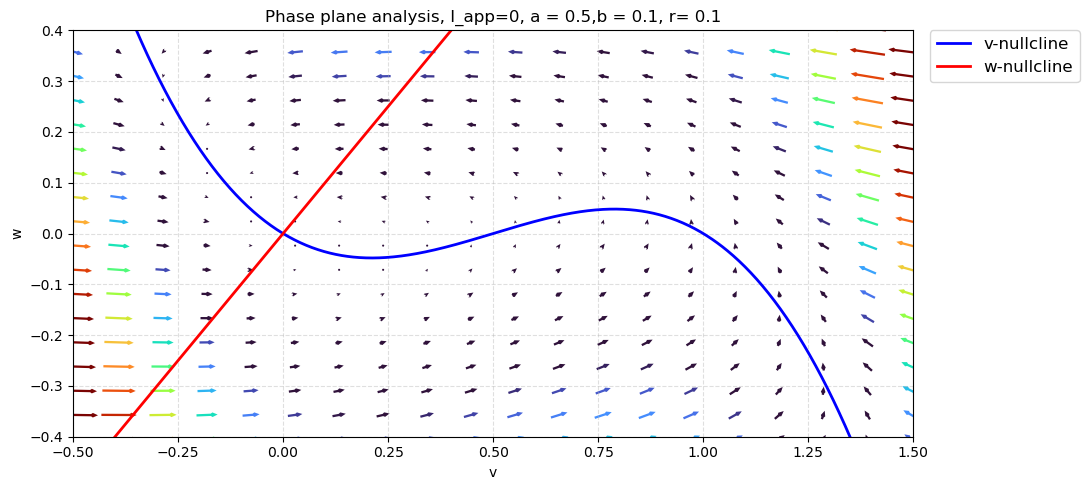

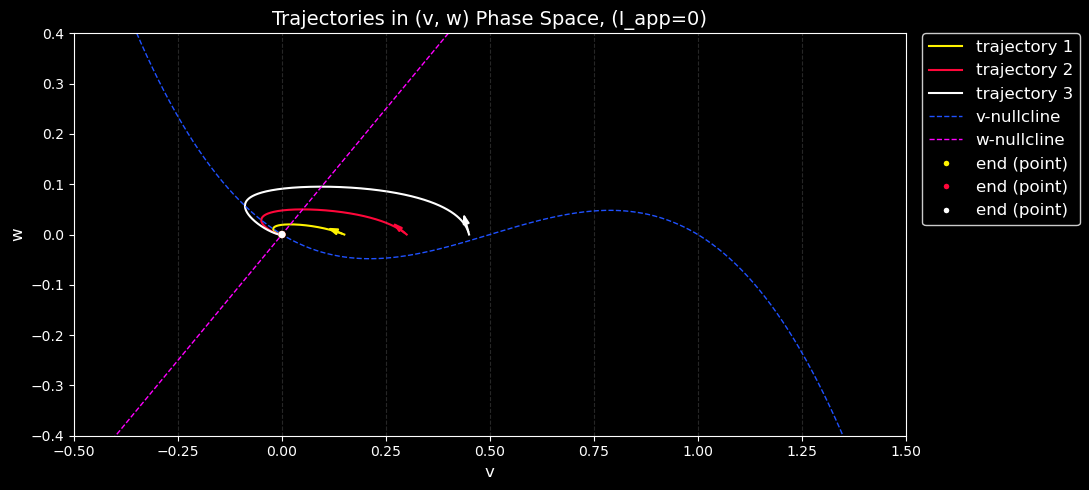

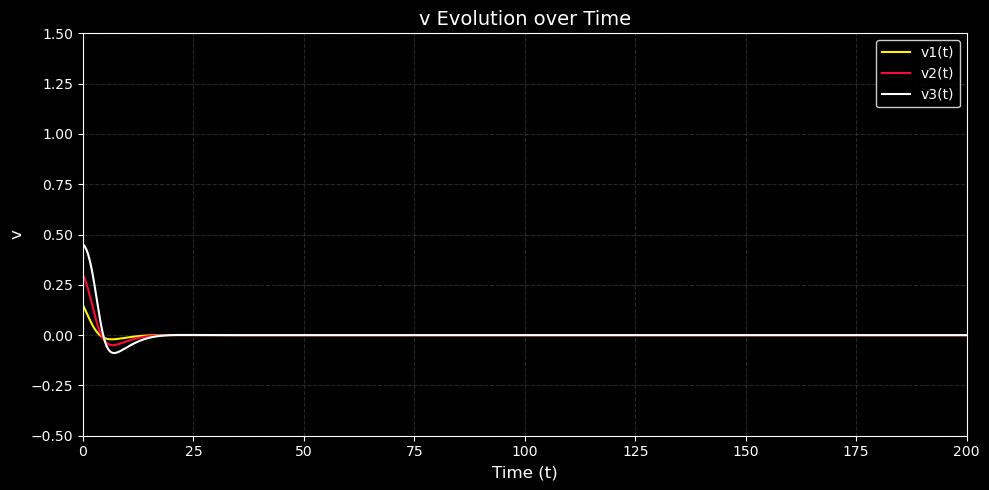

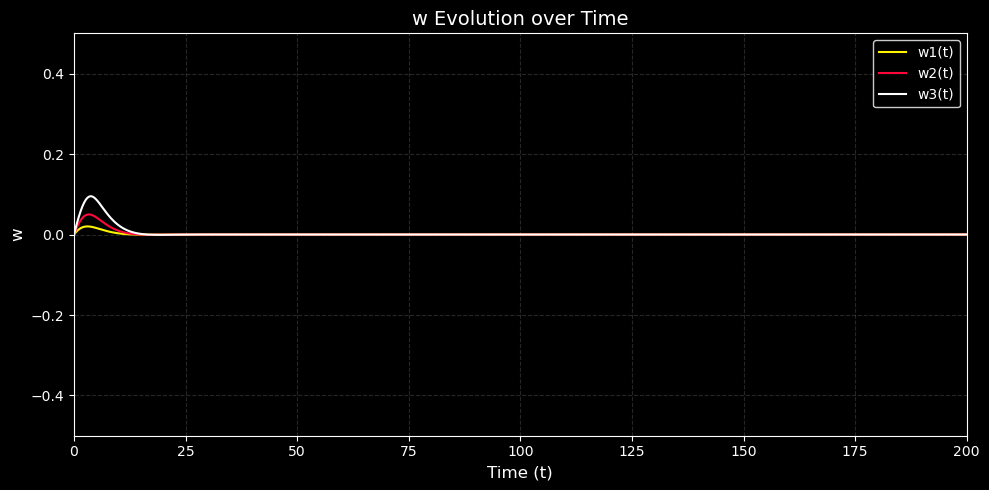

In [6]:
# CASE I (A)
# I_app = 0; V(0) < a and W (0)= 0

I_app = 0
xlim1,xlim2 = -0.5, 1.5
ylim1,ylim2 = -0.4, 0.4

FN = FNNeuron()

v1, w1, t1 = FN.model(0.15, 0, I_app)
v2, w2, t2 = FN.model(0.30, 0, I_app)
v3, w3, t3 = FN.model(0.45, 0, I_app)

FN.PhasePlots(I_app,xlim1,xlim2,ylim1,ylim2)
print("\n\n\n")

Trajectories(v1, v2, v3, w1, w2, w3,xlim1,xlim2,ylim1,ylim2,I_app)
print("\n\n\n")

VT_plot(v1,v2,v3,t1,t2,t3)
print("\n\n\n")

WT_plot(w1,w2,w3,t1,t2,t3,-0.5,0.5)

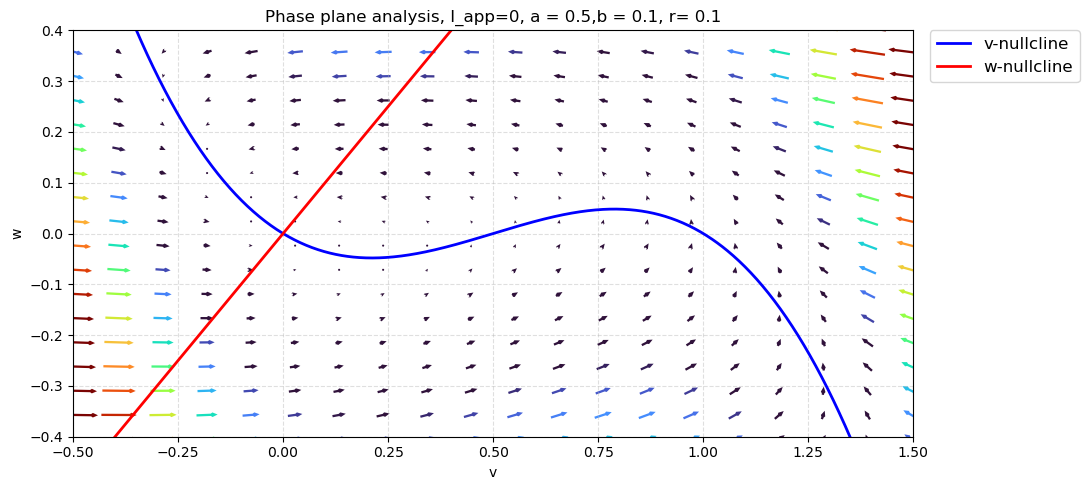

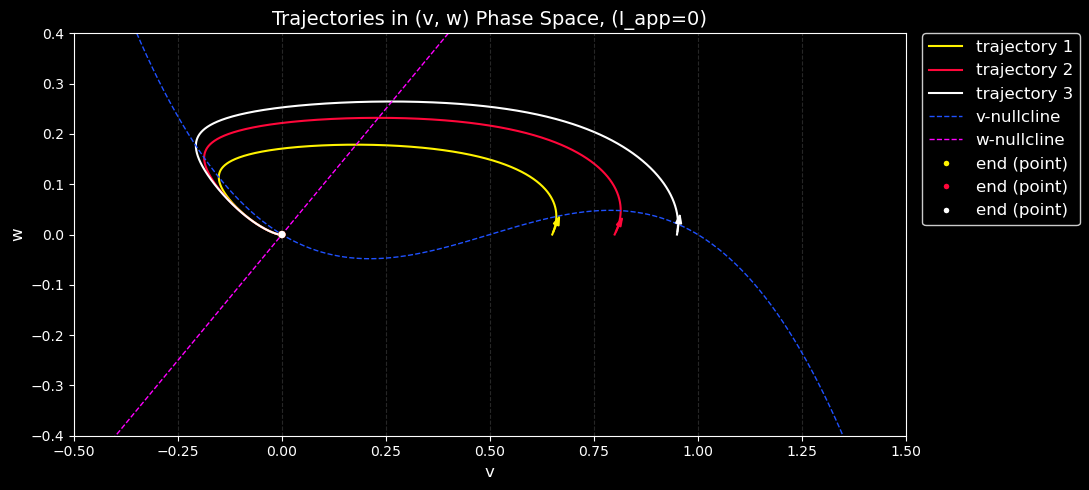

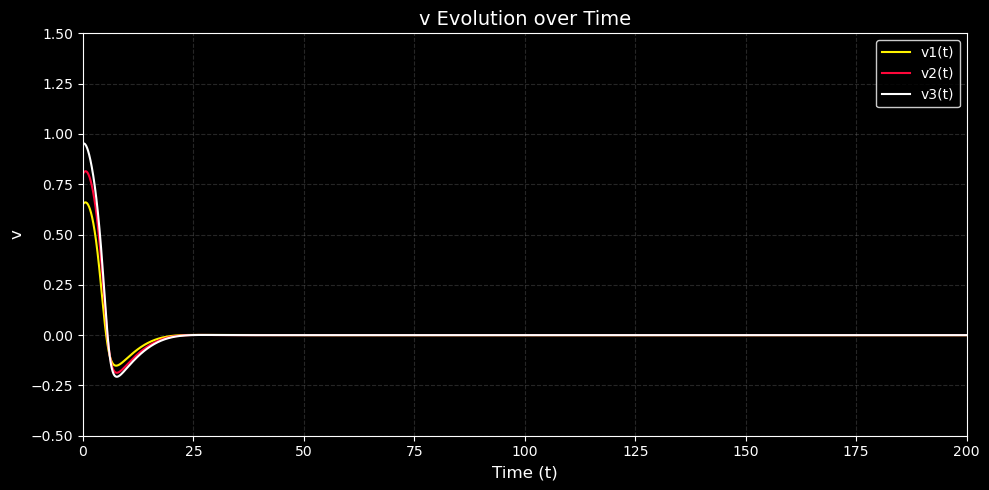

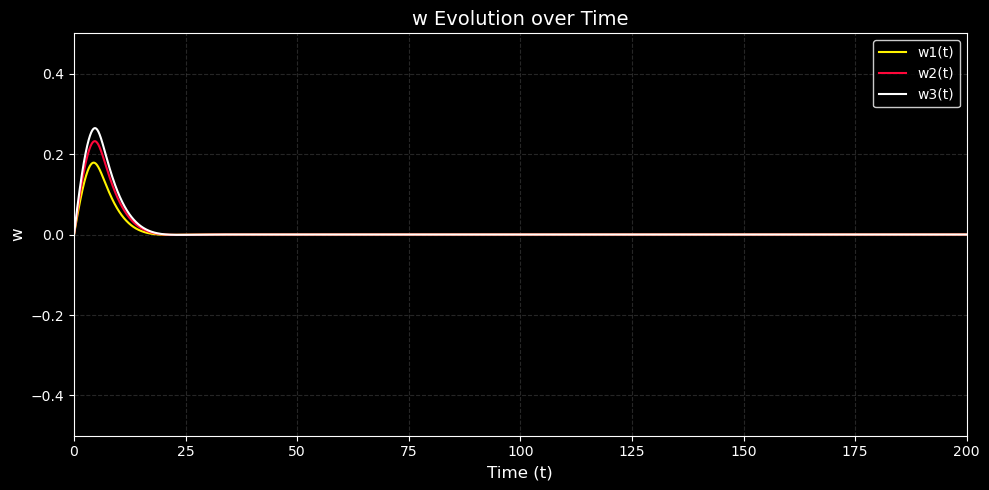

In [7]:
# CASE I (B)
# I_app = 0; V(0) > a and W (0)= 0

I_app = 0
xlim1,xlim2 = -0.5, 1.5
ylim1,ylim2 = -0.4, 0.4

FN = FNNeuron()

v1, w1, t1 = FN.model(0.65, 0, I_app)
v2, w2, t2 = FN.model(0.80, 0, I_app)
v3, w3, t3 = FN.model(0.95, 0, I_app)

FN.PhasePlots(I_app,xlim1,xlim2,ylim1,ylim2)
print("\n\n\n")

Trajectories(v1, v2, v3, w1, w2, w3,xlim1,xlim2,ylim1,ylim2,I_app)
print("\n\n\n")

VT_plot(v1,v2,v3,t1,t2,t3)
print("\n\n\n")

WT_plot(w1,w2,w3,t1,t2,t3,-0.5,0.5)

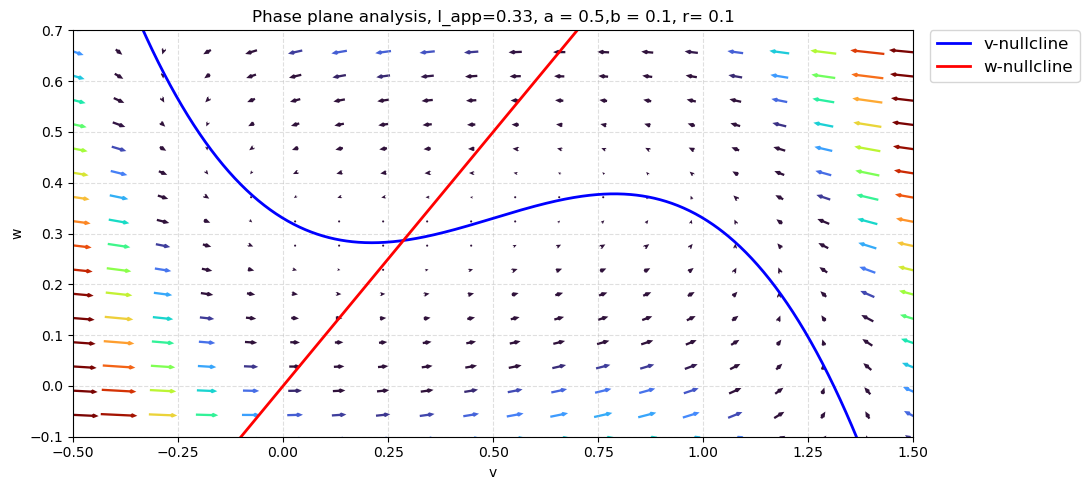

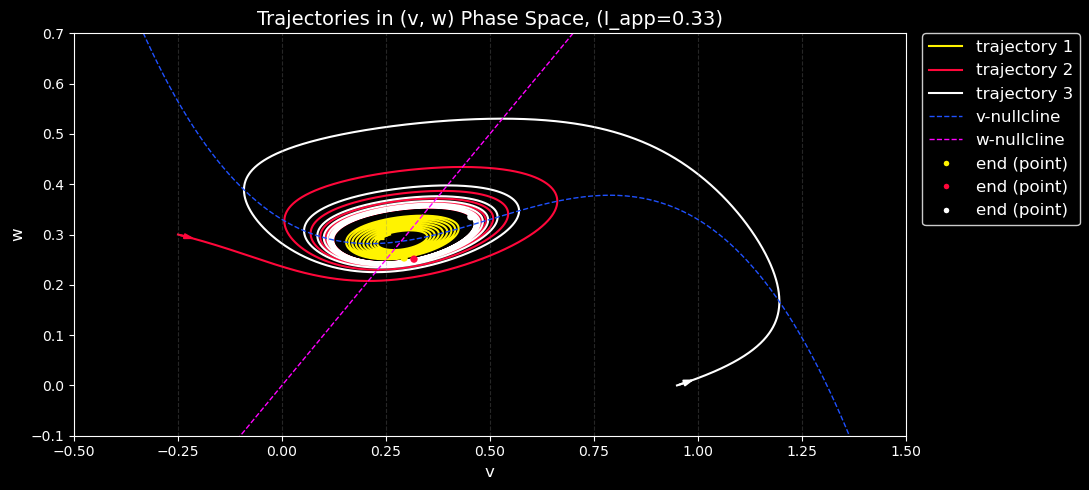

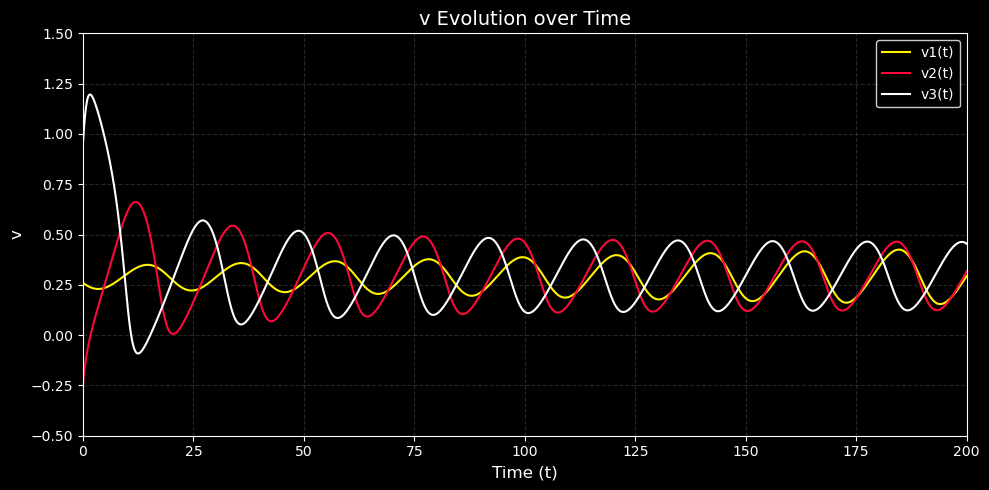

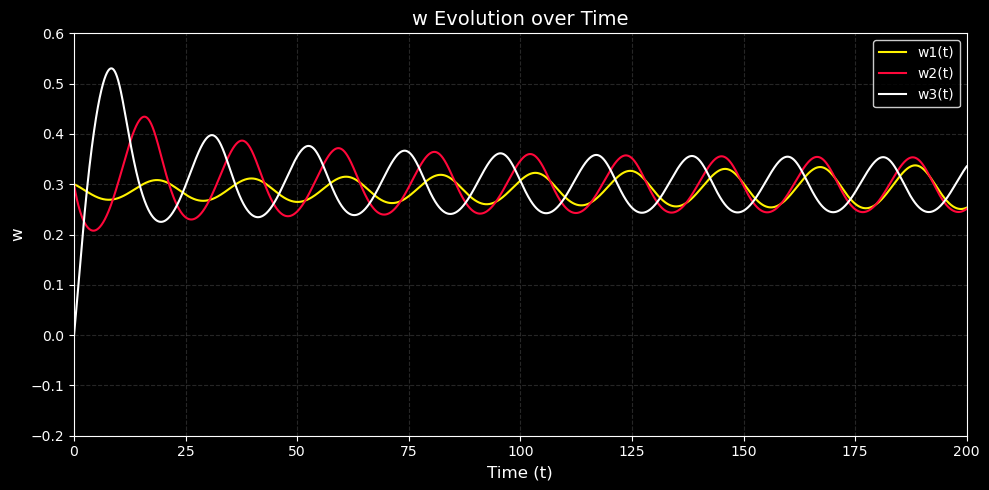

In [8]:
# CASE II (A)
# I_app =/= 0;

I_app = 0.33
xlim1,xlim2 = -0.5, 1.5
ylim1,ylim2 = -0.1, 0.7

FN = FNNeuron()

v1, w1, t1 = FN.model(0.26, 0.3, I_app)
v2, w2, t2 = FN.model(-0.25, 0.3, I_app)
v3, w3, t3 = FN.model(0.95, 0, I_app)

FN.PhasePlots(I_app,xlim1,xlim2,ylim1,ylim2)
print("\n\n\n")

Trajectories(v1, v2, v3, w1, w2, w3,xlim1,xlim2,ylim1,ylim2,I_app)
print("\n\n\n")

VT_plot(v1,v2,v3,t1,t2,t3)
print("\n\n\n")

WT_plot(w1,w2,w3,t1,t2,t3,-0.2,0.6)

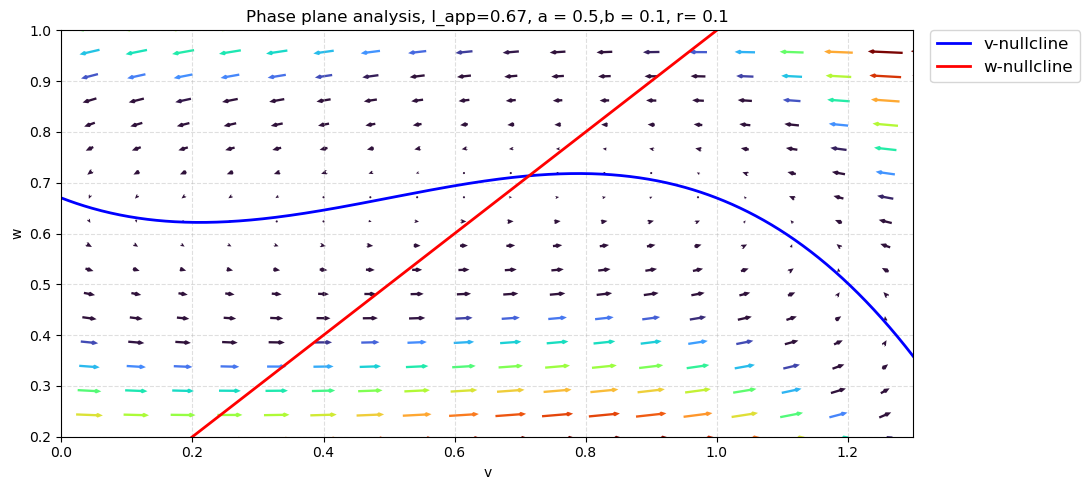

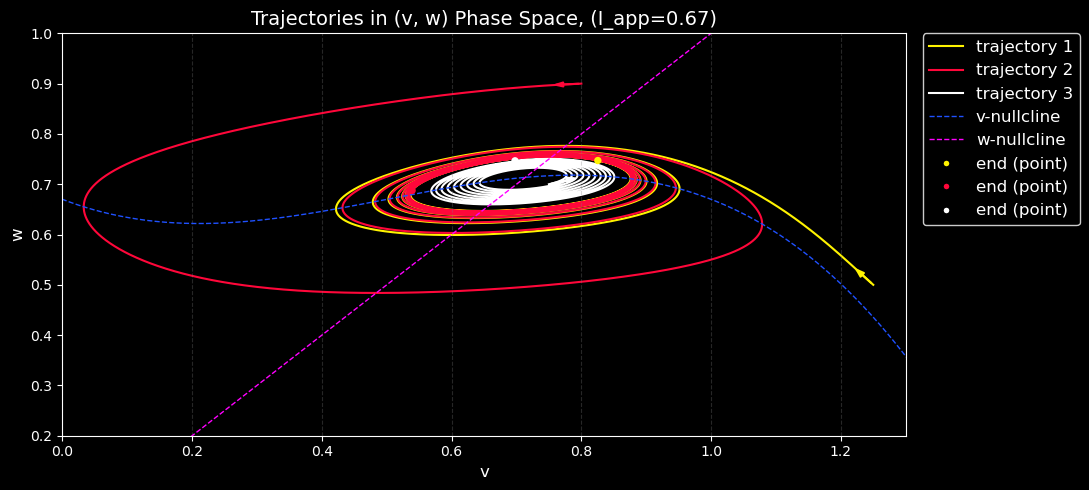

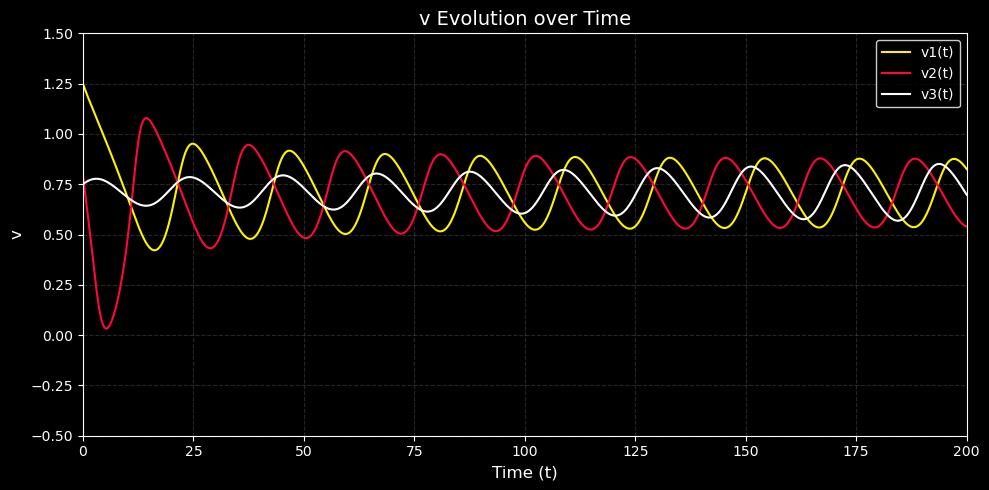

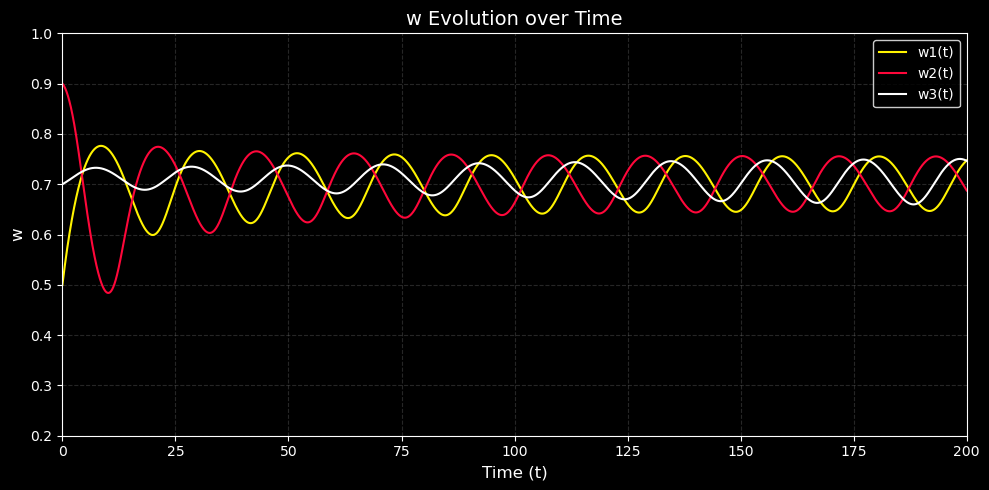

In [9]:
# CASE II (B)
# I_app =/= 0;

I_app = 0.67
xlim1,xlim2 = 0, 1.3
ylim1,ylim2 = 0.2, 1.0

FN = FNNeuron()

v1, w1, t1 = FN.model(1.25, 0.5, I_app)
v2, w2, t2 = FN.model(0.80, 0.9, I_app)
v3, w3, t3 = FN.model(0.75, 0.7, I_app)

FN.PhasePlots(I_app,0,1.3,0.2,1.0)
print("\n\n\n")

Trajectories(v1, v2, v3, w1, w2, w3,xlim1,xlim2,ylim1,ylim2,I_app)
print("\n\n\n")

VT_plot(v1,v2,v3,t1,t2,t3)
print("\n\n\n")

WT_plot(w1,w2,w3,t1,t2,t3,0.2,1.0)

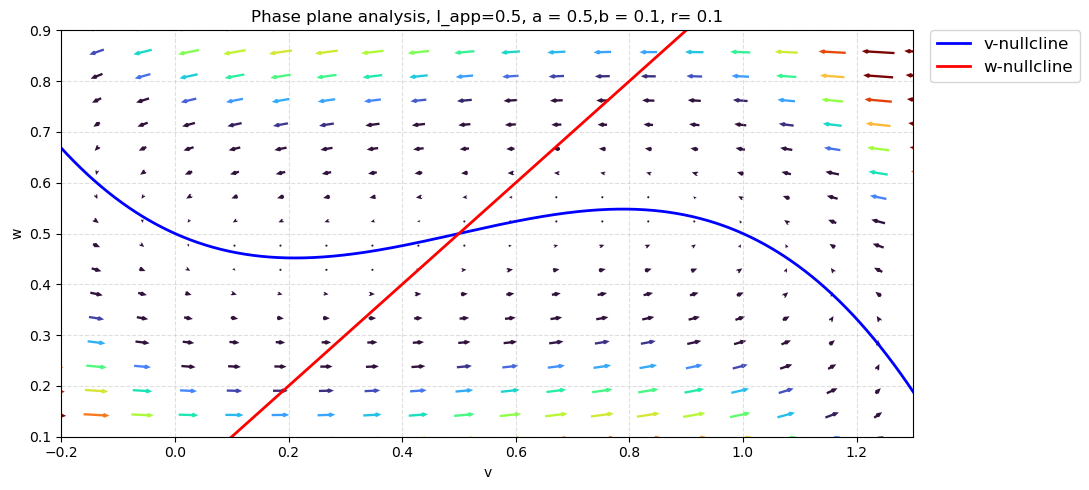

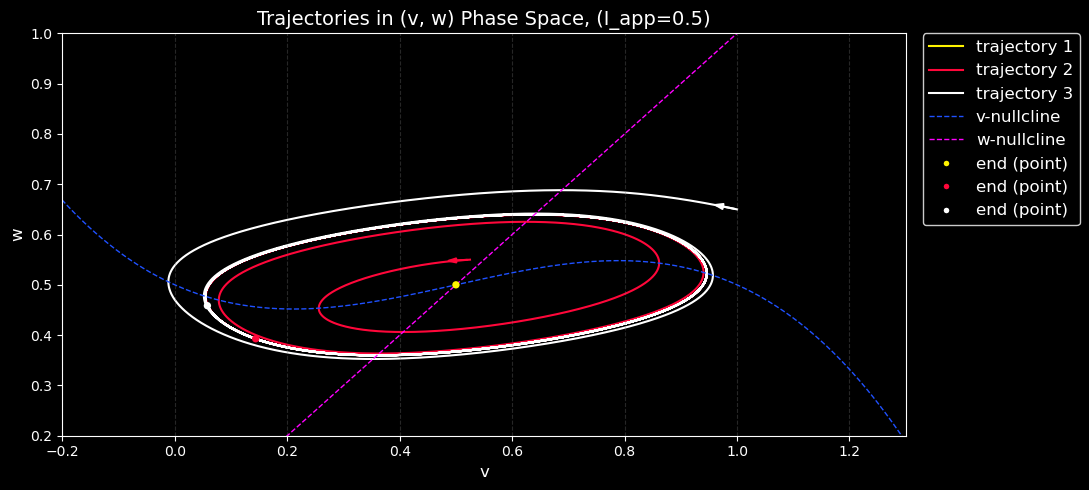

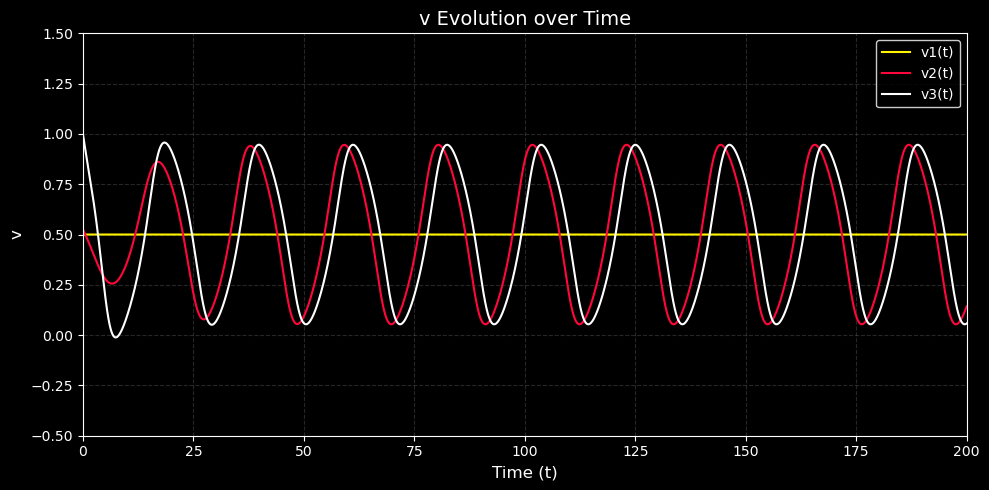

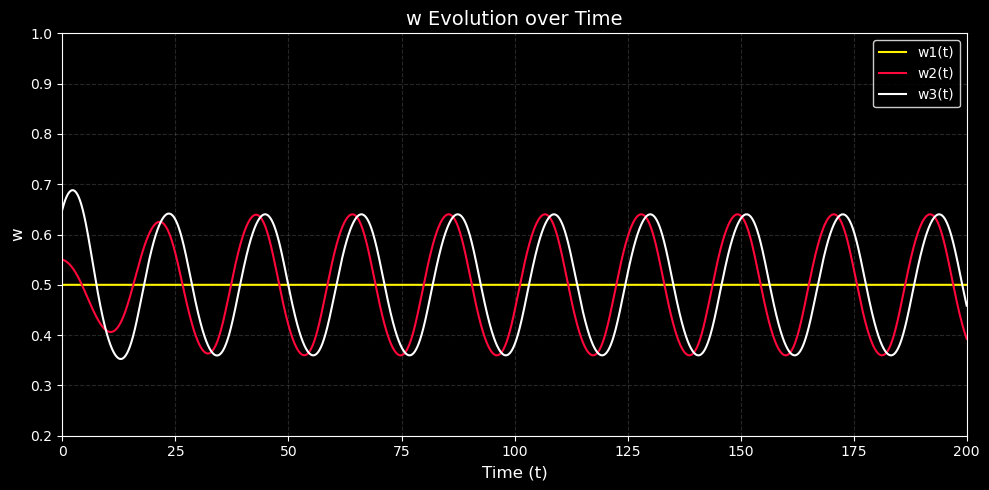

In [10]:
# CASE II (B)
# I_app =/= 0;

I_app = 0.5
xlim1,xlim2 = -0.2, 1.3
ylim1,ylim2 = 0.2, 1.0

FN = FNNeuron()

v1, w1, t1 = FN.model(0.5, 0.5, I_app)
v2, w2, t2 = FN.model(0.525, 0.55, I_app)
v3, w3, t3 = FN.model(1.0, 0.65, I_app)

FN.PhasePlots(I_app,-0.2,1.3,0.1,0.9)
print("\n\n\n")

Trajectories(v1, v2, v3, w1, w2, w3,xlim1,xlim2,ylim1,ylim2,I_app)
print("\n\n\n")

VT_plot(v1,v2,v3,t1,t2,t3)
print("\n\n\n")

WT_plot(w1,w2,w3,t1,t2,t3,0.2,1.0)

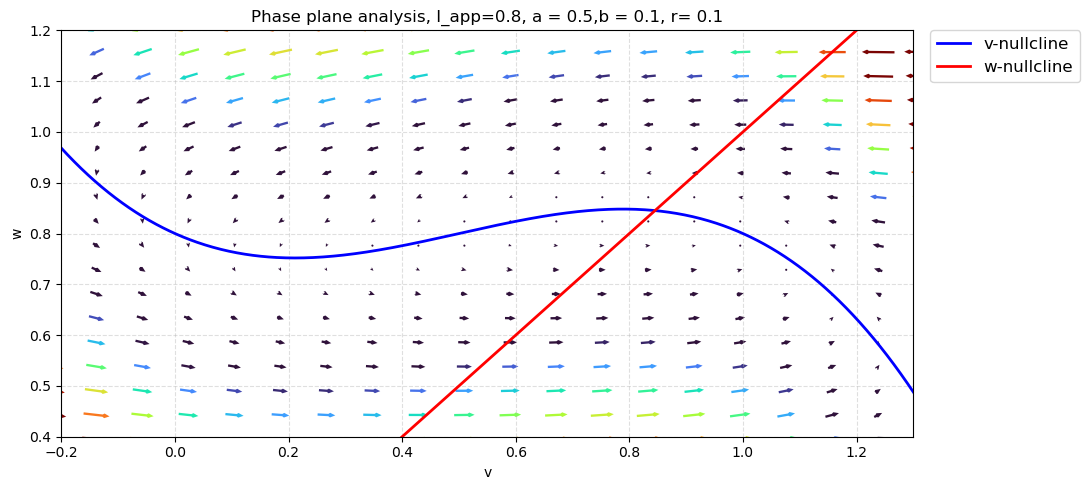

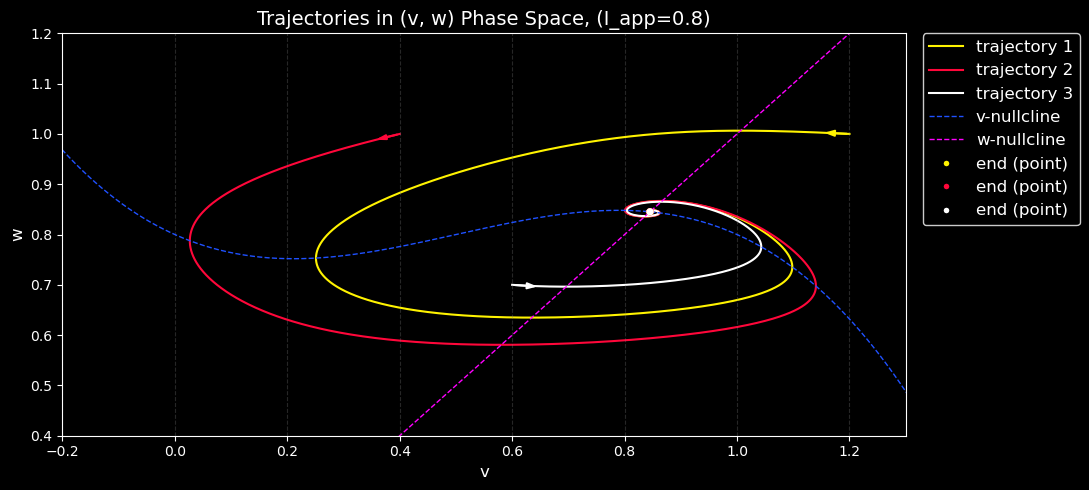

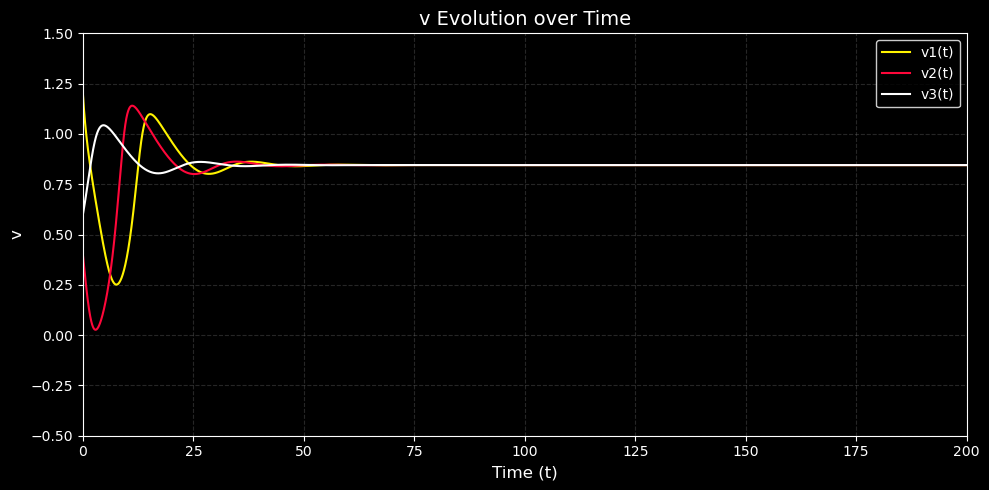

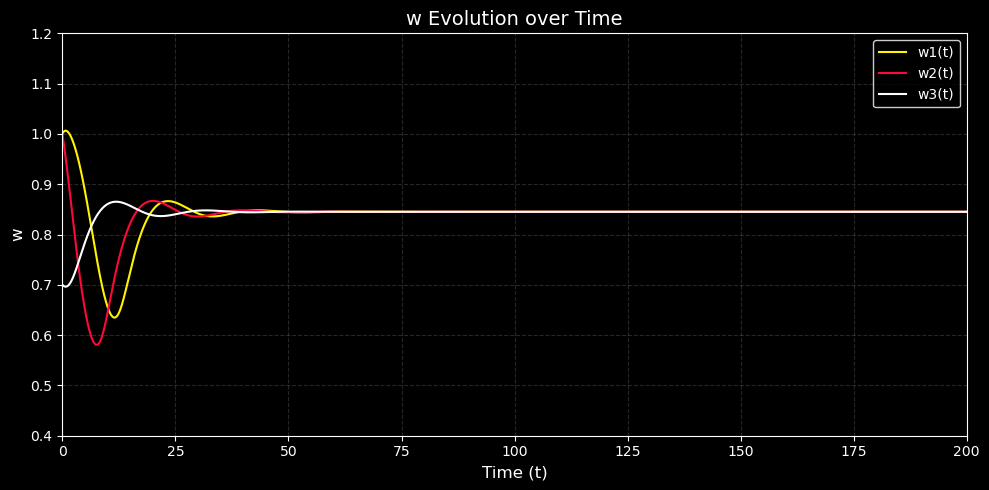

In [11]:
# CASE III
# I_app > I2;

I_app = 0.8
xlim1,xlim2 = -0.2, 1.3
ylim1,ylim2 = 0.4, 1.2

FN = FNNeuron()

v1, w1, t1 = FN.model(1.2, 1.0, I_app)
v2, w2, t2 = FN.model(0.4, 1.0, I_app)
v3, w3, t3 = FN.model(0.6, 0.7, I_app)

FN.PhasePlots(I_app,-0.2,1.3,0.4,1.2)
print("\n\n\n")

Trajectories(v1, v2, v3, w1, w2, w3,xlim1,xlim2,ylim1,ylim2,I_app)
print("\n\n\n")

VT_plot(v1,v2,v3,t1,t2,t3)
print("\n\n\n")

WT_plot(w1,w2,w3,t1,t2,t3,0.4,1.2)

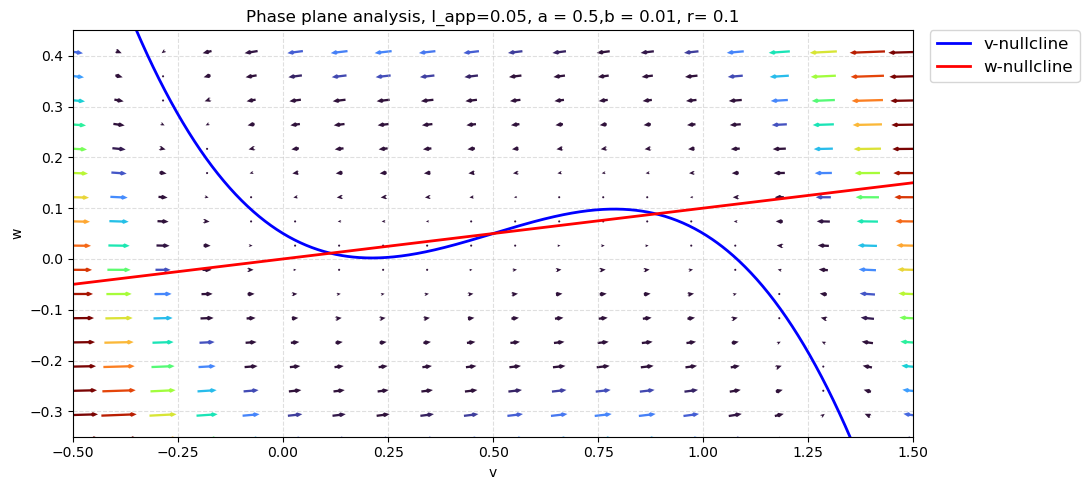

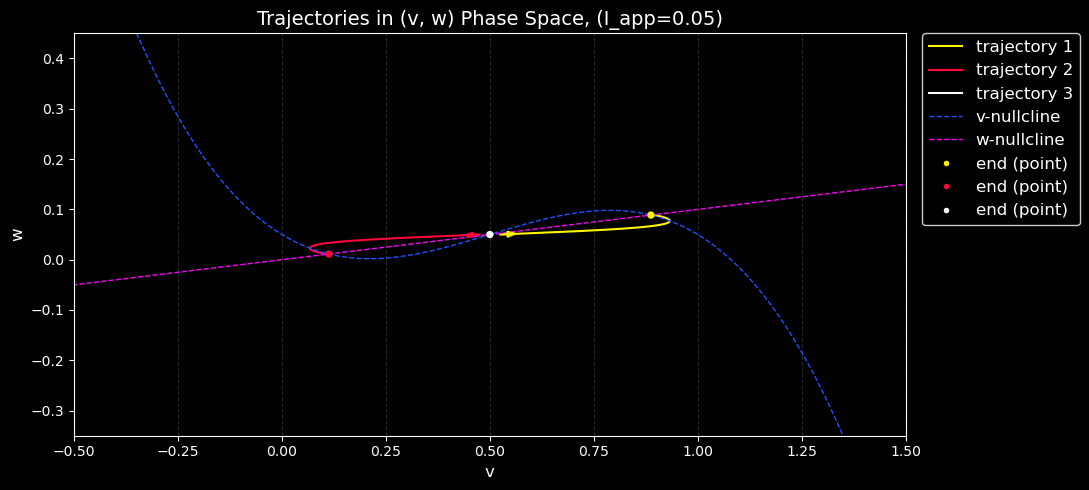

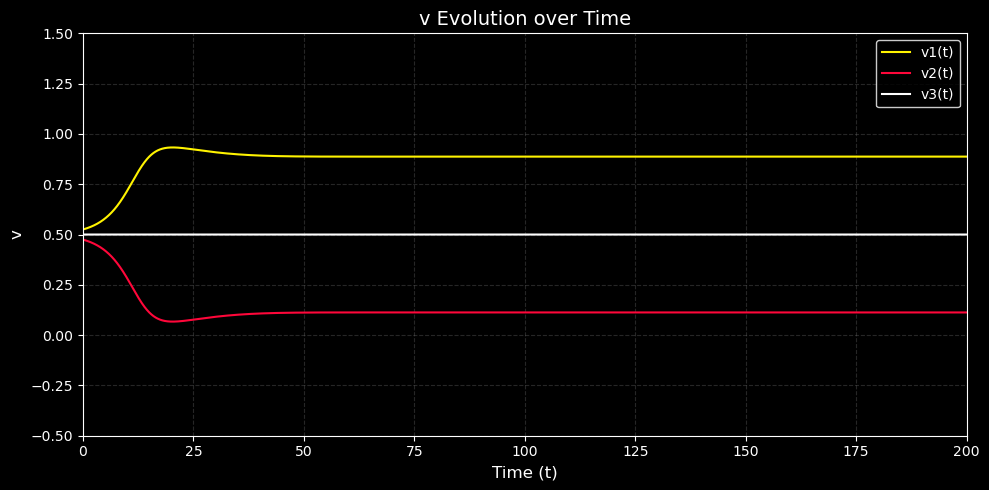

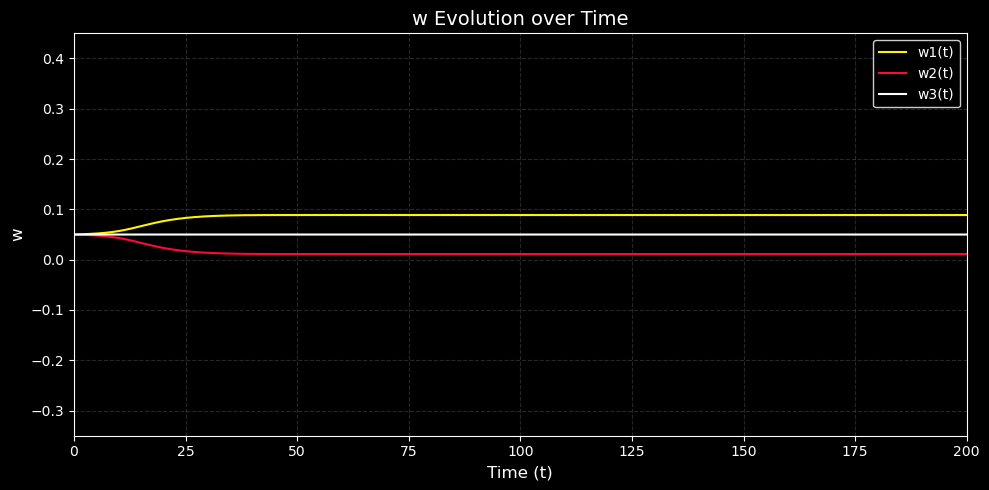

In [12]:
# CASE IV
# Bistability

I_app = 0.05
xlim1,xlim2 = -0.5, 1.5
ylim1,ylim2 = -0.35, 0.45

FN = FNNeuron(a = 0.5 , b = 0.01 , r = 0.1)

v1, w1, t1 = FN.model(0.525, 0.05, I_app)
v2, w2, t2 = FN.model(0.475, 0.05, I_app)
v3, w3, t3 = FN.model(0.5, 0.05, I_app)

FN.PhasePlots(I_app,xlim1,xlim2,ylim1,ylim2)
print("\n\n\n")

Trajectories(v1, v2, v3, w1, w2, w3,xlim1,xlim2,ylim1,ylim2,I_app,a = 0.5 , b = 0.01 , r = 0.1)
print("\n\n\n")

VT_plot(v1,v2,v3,t1,t2,t3)
print("\n\n\n")

WT_plot(w1,w2,w3,t1,t2,t3,ylim1,ylim2)

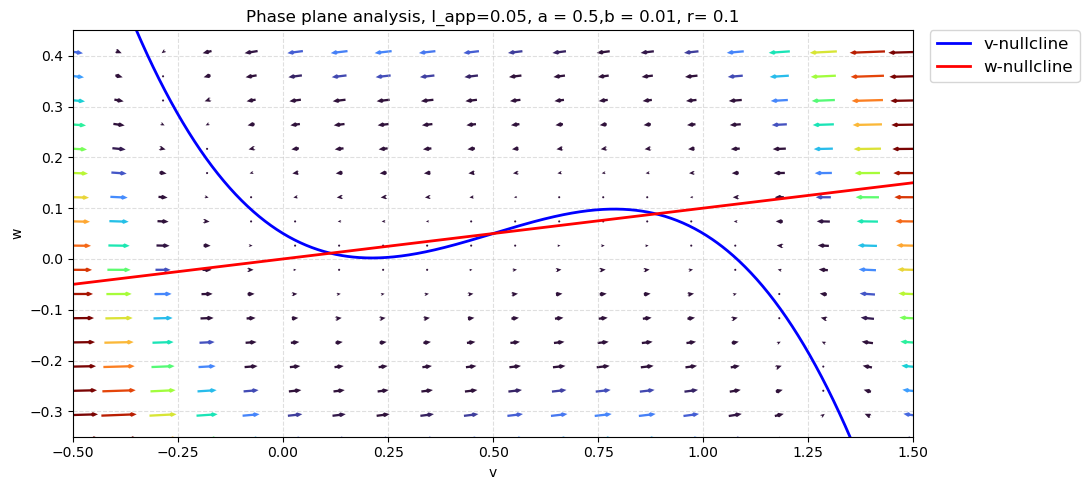

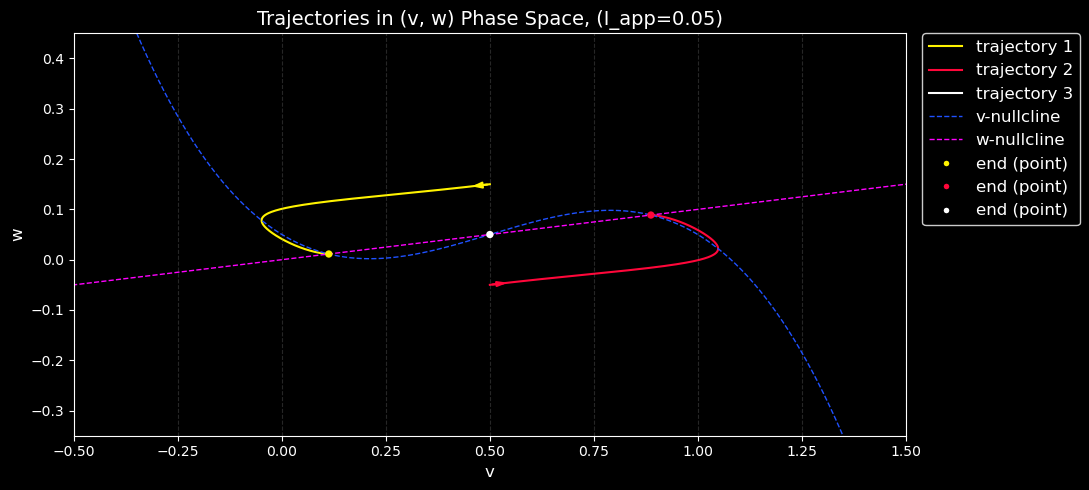

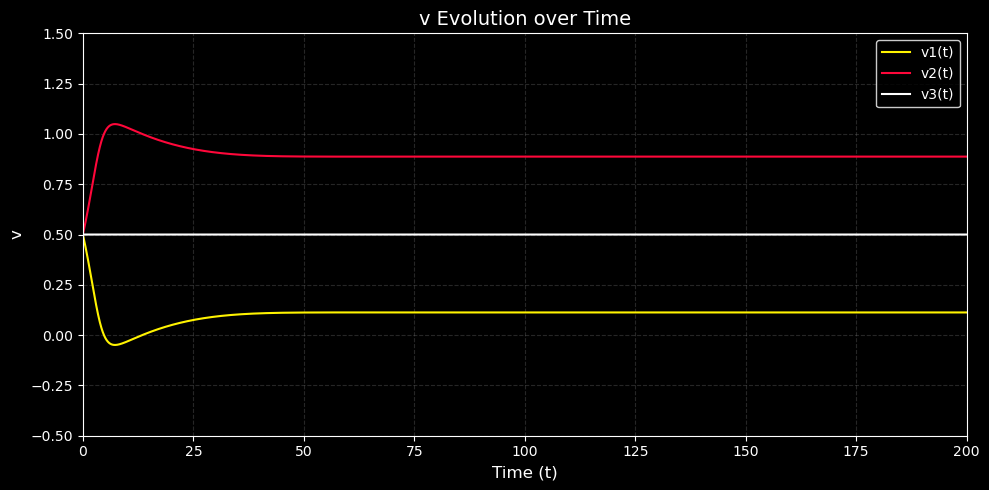

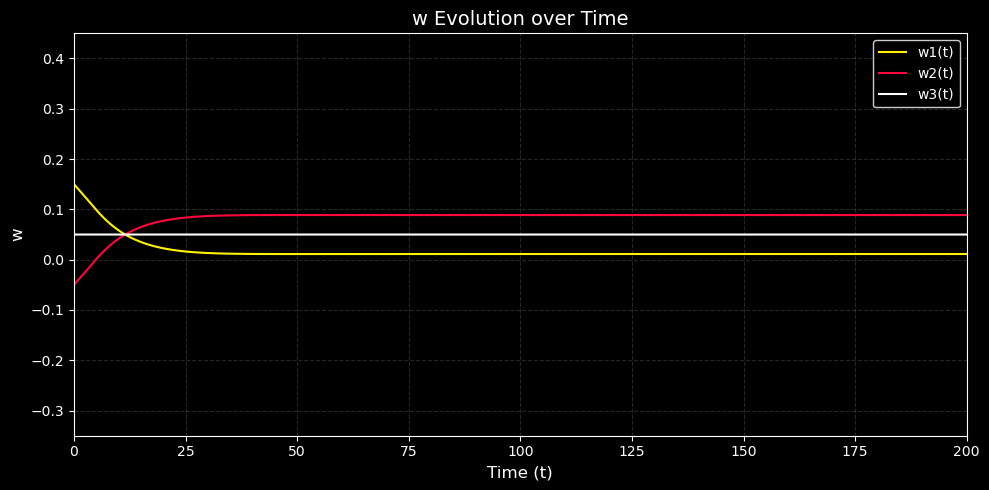

In [13]:
# CASE IV
# Bistability

I_app = 0.05
xlim1,xlim2 = -0.5, 1.5
ylim1,ylim2 = -0.35, 0.45

FN = FNNeuron(a = 0.5 , b = 0.01 , r = 0.1)

v1, w1, t1 = FN.model(0.5, 0.15, I_app)
v2, w2, t2 = FN.model(0.5, -0.05, I_app)
v3, w3, t3 = FN.model(0.5, 0.05, I_app)

FN.PhasePlots(I_app,xlim1,xlim2,ylim1,ylim2)
print("\n\n\n")

Trajectories(v1, v2, v3, w1, w2, w3,xlim1,xlim2,ylim1,ylim2,I_app, a = 0.5 , b = 0.01 , r = 0.1)
print("\n\n\n")

VT_plot(v1,v2,v3,t1,t2,t3)
print("\n\n\n")

WT_plot(w1,w2,w3,t1,t2,t3,ylim1,ylim2)